# Description

**TODO:** This section of the notebook will be updated when I start actively writing the manuscript. Here I left some code to see the percentage of times a group of traits was clustered togethern across the entire ensemble.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name
import conf

# Settings

In [3]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering')

## Functions

In [4]:
from IPython.display import HTML

In [5]:
def plot_cluster(data, partition, cluster_number, figsize=None):
    k = np.unique(partition).shape[0]

    display(HTML(f"<h3>Cluster {k}.{cluster_number}</h3>"))

    k_traits = data.loc[partition == cluster_number].index

    with sns.plotting_context("paper"):
        f, ax = plt.subplots(figsize=figsize)  # (figsize=(8, 8))

        display(
            sns.heatmap(
                data=coassoc_matrix.loc[k_traits, k_traits],
                vmin=coassoc_matrix_stats["50%"],
                vmax=1.0,
                annot=True,
                fmt=".2f",
                square=True,
            )
        )

## Load data

In [6]:
INPUT_SUBSET = "umap"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 5,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_5-n_neighbors_15-random_state_0'

In [10]:
data_umap = pd.read_pickle(input_filepath)

In [11]:
data_umap.shape

(3749, 5)

In [12]:
data_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5
100001_raw-Food_weight,-8.437452,1.664409,9.233617,6.944210,16.781176
100002_raw-Energy,-8.388347,1.670845,9.251021,6.975690,16.698511
100003_raw-Protein,-8.424020,1.696144,9.226449,6.970763,16.768959
100004_raw-Fat,-8.393674,1.685311,9.258855,6.992673,16.728815
100005_raw-Carbohydrate,-8.427763,1.685172,9.234971,6.967204,16.751522


# Load best partitions

In [13]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [14]:
best_partitions = pd.read_pickle(input_file)

In [15]:
best_partitions.shape

(39, 4)

In [16]:
best_partitions.head()

,method,partition,ami_mean,selected
k,,,,
11,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301837,True
10,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301736,True
9,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301299,True
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300169,True
7,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.299448,True


# Load coassociation matrix

In [17]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [18]:
coassoc_matrix = np.load(input_file)

In [19]:
coassoc_matrix = pd.DataFrame(
    data=1.0 - coassoc_matrix,
    index=data_umap.index.copy(),
    columns=data_umap.index.copy(),
)

In [20]:
coassoc_matrix.shape

(3749, 3749)

In [21]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,1.000000,0.943841,0.946105,0.923687,0.942482,0.924366,0.925272,0.942029,0.944520,0.432518,...,0.395777,0.397645,0.405436,0.396739,0.417572,0.451269,0.309359,0.400136,0.338286,0.332428
100002_raw-Energy,0.943841,1.000000,0.972600,0.955163,0.978034,0.954257,0.932518,0.968750,0.951993,0.438632,...,0.393960,0.395607,0.405663,0.393569,0.414176,0.428830,0.312356,0.398777,0.340114,0.334692
100003_raw-Protein,0.946105,0.972600,1.000000,0.953125,0.981884,0.952219,0.935236,0.967618,0.949049,0.441576,...,0.397366,0.398324,0.407475,0.396513,0.418025,0.428150,0.308898,0.402174,0.338971,0.337183
100004_raw-Fat,0.923687,0.955163,0.953125,1.000000,0.954484,0.995245,0.953804,0.971694,0.942029,0.448143,...,0.409628,0.410326,0.421744,0.404212,0.428668,0.414098,0.307746,0.411685,0.332571,0.333333
100005_raw-Carbohydrate,0.942482,0.978034,0.981884,0.954484,1.000000,0.953804,0.932065,0.974411,0.949955,0.440217,...,0.394187,0.395607,0.406795,0.395154,0.415308,0.425431,0.312586,0.399457,0.342857,0.337183


## Stats

In [22]:
df = coassoc_matrix.where(np.triu(np.ones(coassoc_matrix.shape)).astype(np.bool))
df = df.stack().reset_index()

coassoc_matrix_stats = df[0].describe()

[2021-01-14 10:39:21,779 - numexpr.utils] INFO: NumExpr defaulting to 8 threads.


In [23]:
coassoc_matrix_stats

count    7.029375e+06
mean     4.472413e-01
std      1.146346e-01
min      2.516779e-03
25%      3.971984e-01
50%      4.844173e-01
75%      5.169377e-01
max      1.000000e+00
Name: 0, dtype: float64

In [24]:
# show the general stats for the coassociation matrix, useful to compare results of clusters
coassoc_matrix_stats.apply(str)

count               7029375.0
mean      0.44724131962940733
std       0.11463464645061995
min      0.002516778523489971
25%        0.3971983732489833
50%       0.48441734417344173
75%        0.5169376693766938
max                       1.0
Name: 0, dtype: object

# Plot coassociation of clusters

In [25]:
k = 5
display(HTML(f"<h2>k: {k}</h2>"))
display(best_partitions.loc[k])

part = best_partitions.loc[k, "partition"]
part_stats = pd.Series(part).value_counts()
display(part_stats)

method                              eac_average_coassoc_matrix
partition    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
ami_mean                                              0.298287
selected                                                  True
Name: 5, dtype: object

0    3641
1      47
3      41
2      12
4       8
dtype: int64

<AxesSubplot:>

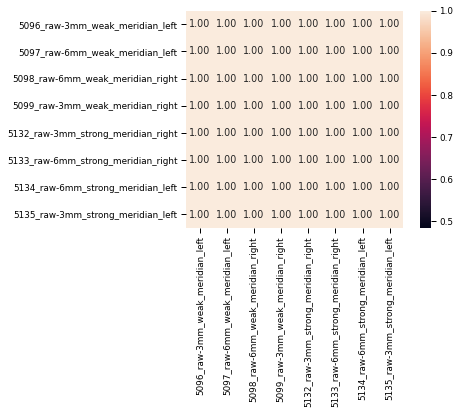

In [26]:
plot_cluster(data_umap, part, 4)

<AxesSubplot:>

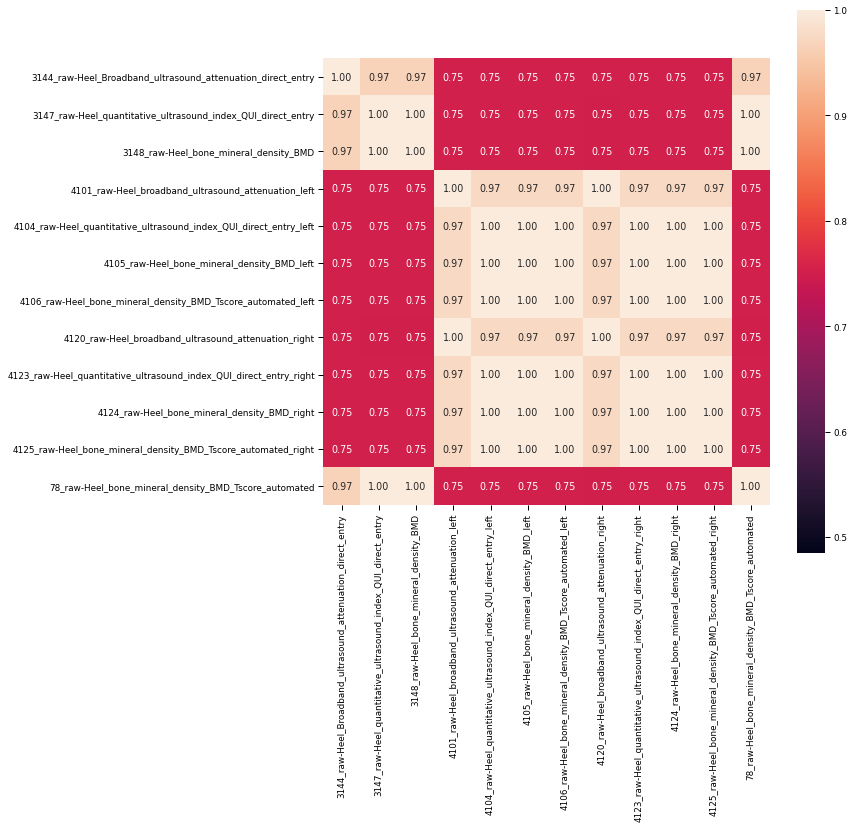

In [27]:
plot_cluster(data_umap, part, 2, figsize=(10, 10))